In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
import pickle
import seaborn as sns

sys.path.append('..')

In [18]:
from simulations.scenarios import *

In [4]:
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")
sns.set_palette('colorblind', n_colors=4)

In [5]:
parsed_logs_folder = 'Enron/parsing/'
social_graph = pickle.load(open(parsed_logs_folder + "social.pkl", "rb"))
log = pickle.load(open(parsed_logs_folder + "replay_log.pkl", "rb"))[:50000]

In [6]:
context = Context(log, social_graph)

In [7]:
def visualize_propagation(scenario_name, kp, hp=None):
    kp = kp[['Stale', 'Updated']]
    
    kp.plot.area()
    plt.legend(frameon=True)
    plt.title("%s — Encryption keys propagation" % scenario_name)
    plt.xlabel("Emails sent")
    plt.ylabel("Link Key status")
    
    plt.savefig(scenario_name.lower().replace(' ', '_') + '_key_propagation.pdf')

    if hp is not None:
        hp = hp[['Stale', 'Updated']]
        hp.plot.area()
        plt.legend(frameon=True)
        plt.title("%s — Head propagation" % scenario_name)
        plt.xlabel("Emails sent")
        plt.ylabel("Link Head status")

        plt.savefig(scenario_name.lower().replace(' ', '_') + '_head_propagation.pdf')

In [8]:
def visualize_encryption_status_history(scenario_name, es):
    dummies = pd.DataFrame(columns=['Stale key', 'Encrypted', 'Plaintext'])
    for i, item in enumerate(es):
        if item == EncStatus.stale:
            dummies.loc[i] = [1, 0, 0]
        elif item == EncStatus.encrypted:
            dummies.loc[i] = [0, 1, 0]
        elif item == EncStatus.plaintext:
            dummies.loc[i] = [0, 0, 1]
    
    cumdata = dummies.cumsum()
    cumdata.plot.area()
    plt.legend(frameon=True)
    plt.title("%s — Encryption status" % scenario_name)
    plt.xlabel("Emails sent")
    plt.ylabel("Emails sent")

In [9]:
def visualize_encryption_status_history(scenario_name, es, batch_size=100):
    batch_stats_data = pd.DataFrame(columns=['Plaintext', 'Encrypted', 'Stale key'])
    for i in range(0, len(es), batch_size):
        batch_stats = es[i:i+batch_size].value_counts()
        batch_stats_data.loc[i] = list(batch_stats[[EncStatus.plaintext, EncStatus.encrypted, EncStatus.stale]])
    
    batch_stats_data.plot.area()
    plt.legend(frameon=True)
    plt.title("%s — Encryption status" % scenario_name)
    plt.xlabel("Email sent")
    plt.ylabel("Emails traffic, %")

In [10]:
with SimulationParams(key_update_every_nb_sent_emails=None).as_default():
    ac_hp, ac_es = simulate_autocrypt(context)

Simulating Autocrypt:
SimulationParams(mode='dummy', chain_update_buffer_size=None, key_update_every_nb_sent_emails=None)
Keys.   Updated: 2410, Stale: 0
Emails. Sent: 28163, Encrypted: 10491


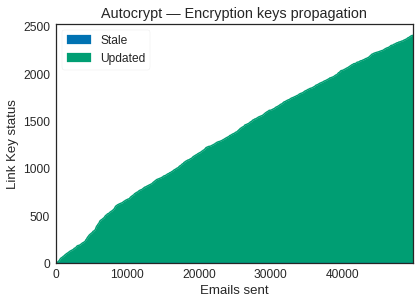

In [11]:
visualize_propagation('Autocrypt', ac_hp)
plt.show()

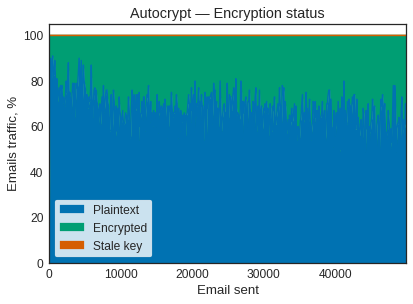

In [12]:
visualize_encryption_status_history('Autocrypt', ac_es)
plt.show()

In [13]:
with SimulationParams(key_update_every_nb_sent_emails=50).as_default():
    dyn_ac_hp, dyn_ac_es = simulate_autocrypt(context)

Simulating Autocrypt:
SimulationParams(mode='dummy', chain_update_buffer_size=None, key_update_every_nb_sent_emails=50)
Keys.   Updated: 2098, Stale: 312
Emails. Sent: 28163, Encrypted: 10491


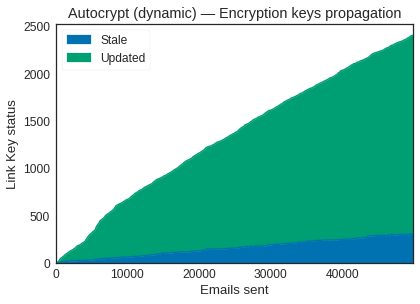

In [14]:
visualize_propagation('Autocrypt (dynamic)', dyn_ac_hp)
plt.show()

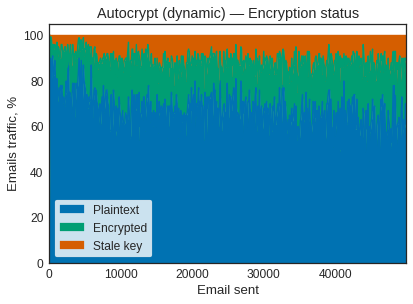

In [15]:
visualize_encryption_status_history('Autocrypt (dynamic)', dyn_ac_es)
plt.show()

In [20]:
static_params = SimulationParams(key_update_every_nb_sent_emails=None, chain_update_buffer_size=5)
dynamic_params = SimulationParams(key_update_every_nb_sent_emails=50, chain_update_buffer_size=5)

In [21]:
with static_params.as_default():
    cc_pub_kp, cc_pub_hp, cc_pub_es = simulate_claimchain_no_privacy(context)

Simulating the ClaimChain with public claims:
SimulationParams(mode='dummy', chain_update_buffer_size=5, key_update_every_nb_sent_emails=None)
Keys:   Updated: 2762, Stale: 0
Heads:  Updated: 2487, Stale: 275
Emails: Sent: 28163, Encrypted: 8774


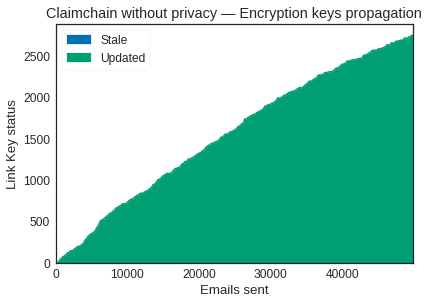

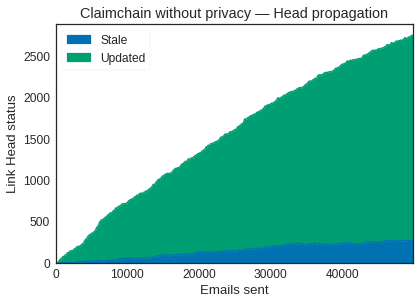

In [22]:
visualize_propagation('Claimchain without privacy', cc_pub_kp, cc_pub_hp)
plt.show()

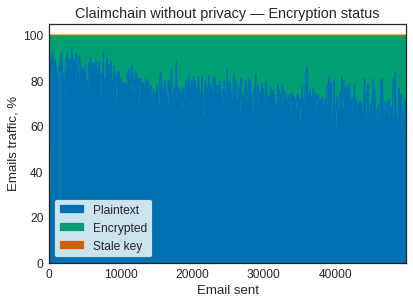

In [23]:
visualize_encryption_status_history('Claimchain without privacy', cc_pub_es)
plt.show()

In [24]:
with static_params.as_default():
    cc_priv_kp, cc_priv_hp, cc_priv_es = simulate_claimchain_with_privacy(context)

Simulating ClaimChain with private claims and introductions:
SimulationParams(mode='dummy', chain_update_buffer_size=5, key_update_every_nb_sent_emails=None)
Keys:   Updated: 2045, Stale: 0
Heads:  Updated: 1795, Stale: 250
Emails: Sent: 28163, Encrypted: 8478


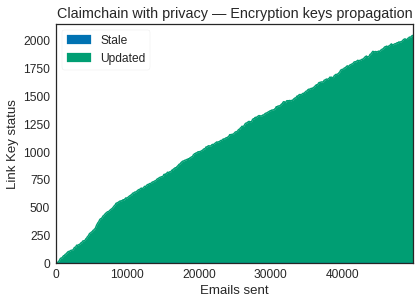

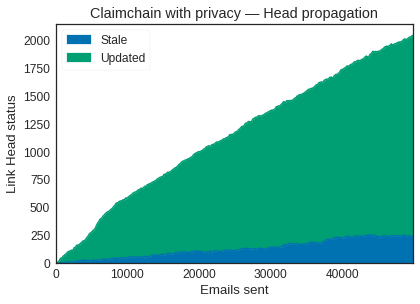

In [25]:
visualize_propagation('Claimchain with privacy', cc_priv_kp, cc_priv_hp)

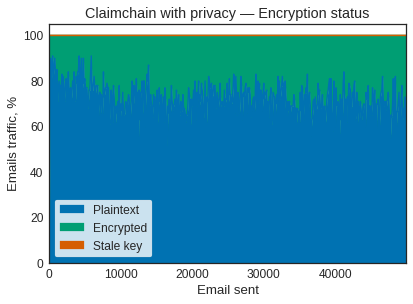

In [26]:
visualize_encryption_status_history('Claimchain with privacy', cc_priv_es)
plt.show()

In [27]:
with dynamic_params.as_default():
    dyn_cc_priv_kp, dyn_cc_priv_hp, dyn_cc_priv_es = simulate_claimchain_with_privacy(context)

Simulating ClaimChain with private claims and introductions:
SimulationParams(mode='dummy', chain_update_buffer_size=5, key_update_every_nb_sent_emails=50)
Keys:   Updated: 1758, Stale: 292
Heads:  Updated: 1732, Stale: 318
Emails: Sent: 28163, Encrypted: 8413


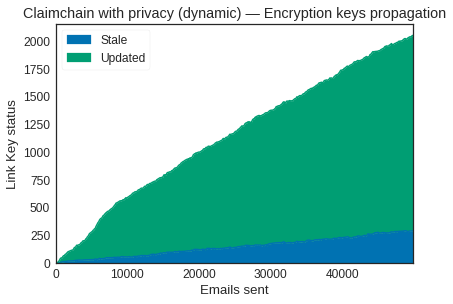

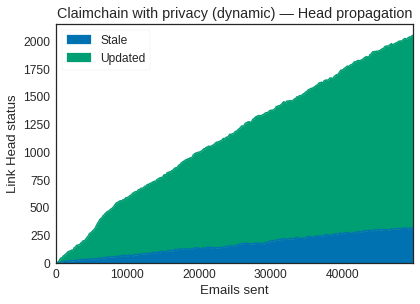

In [28]:
visualize_propagation('Claimchain with privacy (dynamic)', dyn_cc_priv_kp, dyn_cc_priv_hp)

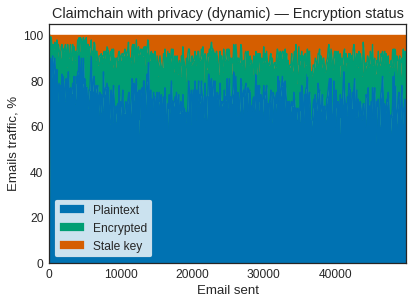

In [29]:
visualize_encryption_status_history('Claimchain with privacy (dynamic)', dyn_cc_priv_es)
plt.show()